GitHub: TheGamerCodes

### **Introduction**: 
### **HR Analytics: Employee Promotion Data**

#### Problem Statement:
A large MNC has nine (9) broad verticals across the organization. One of the problems is identifying the right people for promotion (only for the manager position and below) and preparing them in time.
The final promotions are only announced after the evaluation, which leads to delays in the transition to new roles. Hence, the company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.
Multiple attributes have been provided around Employee's past and current performance and demographics.

The Objective is to **Predict the eligible candidates for promotion**.
Source: https://www.kaggle.com/datasets/arashnic/hr-ana?select=train.csv

#### 1. Import Dependencies. 

Let's start by importing the packages we need:

In [152]:
# Data Handling:
import pandas as pd
import numpy as np

# Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation & Feature Extraction:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Machine Learning Models:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Model Evaluation & Improvement:
from sklearn.metrics import classification_report

# File Handling:
import pickle


import warnings
warnings.filterwarnings('ignore')

#### 2. Load Dataset. 

In [153]:
# Load Dataset:
train = pd.read_csv('train.csv')

In [154]:
# Display 1st few rows:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


#### 3. Data Preprocessing. 

Data preprocessing is an essential step in the data science pipeline. It involves taking corrective measures/steps to ensure that the data is in the best possible condition, free of any error, anomaly or inconsistency.

A dataset can always have empty rows/cells. This problem would make it difficult to perform some aggregations/perform specific operations on the dataset. So instead, we will check for any missing values and impute the missing values appropriately. 

##### a) Check for Missing Values:

In [155]:
# Check for missing Values:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

The 'education' and 'previous_year_rating' columns have missing values. The missing values in the 'education' column, categorical, will be replaced with the mode (most frequently occurring value). In contrast, the missing values in the 'previous_year_rating' column being Numerical, will be replaced with the mean/average value.

##### b) Fill Missing Values:

In [156]:
# Determine Median of train['previous_year_rating']:
rating_mean = round(train['previous_year_rating'].mean(), 1)

# Fill NULL with 'rating_mean':
train['previous_year_rating'] = train['previous_year_rating'].fillna(rating_mean)

In [157]:
# Determine the mode of train['education'] 
education_mode = train['education'].mode()[0]

# Fill NULL with 'education_mode':
train['education'] = train['education'].fillna(education_mode)

We should confirm that there are no longer any empty cells.

In [158]:
# Check for missing Values again:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### 4. Exploratory Data Analysis (EDA):
The goal of EDA is to obtain insights by examining the interactions between the various columns in the dataset.

We need to get some information about the data by producing summary information.

##### a) Basic Summary:

In [159]:
# Look at summary:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


From the above data summary, it can be observed that there are five (5) columns containing categorical data and 8 containing numerical data. 

Next, we will look at Summary Statistics.

##### b) Summary Statistics:

In [160]:
# Summary Stats:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.327054,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.211686,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


The average employee age is 34, the average length of service is 5.8 years, and the average rating stands at 3.3.

##### c) Class Distribution:

We need to check the class distribution in the dataset. It is an essential step for the modeling stage of the project because class imbalance causes Machine Learning models to be better at generalizing the class with a higher number of samples. We do not want this kind of outcome.

Text(0, 0.5, 'Total')

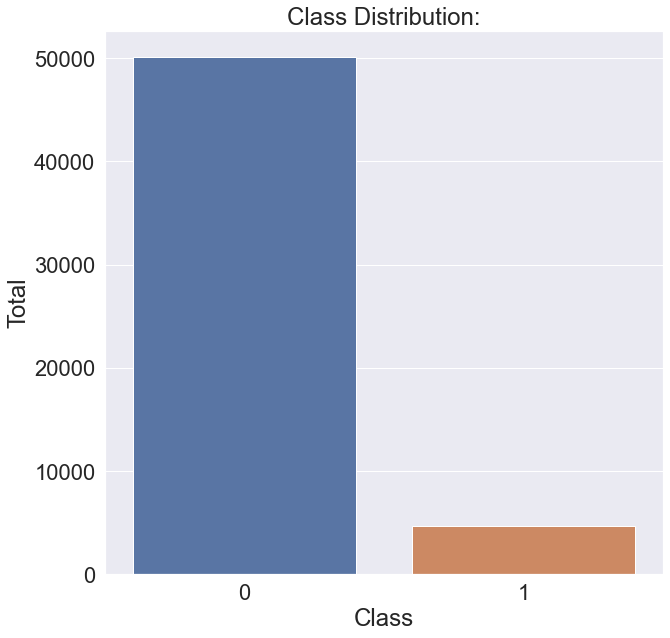

In [161]:
# Check Class Distribution:
plt.figure(figsize=(10,10))
sns.countplot(train['is_promoted'])
plt.title('Class Distribution:')
plt.xlabel('Class')
plt.ylabel('Total')

In [162]:
# Class Distribution Percentage:
class_tot = len(train['is_promoted'])
print(f'Total is: {class_tot}')
class_1 = len(train[train['is_promoted'] == 1])
print(f'Class 1 Total is: {class_1}')
class_0 = len(train[train['is_promoted'] == 0])
print(f'Class 0 Total is: {class_0}')

class1_perc = round(((class_1 / class_tot) * 100), 2)
print(f'Class 1 Percentage is: {class1_perc}%')
class0_perc = round(((class_0 / class_tot) * 100), 2)
print(f'Class 0 Percentage is: {class0_perc}%')

Total is: 54808
Class 1 Total is: 4668
Class 0 Total is: 50140
Class 1 Percentage is: 8.52%
Class 0 Percentage is: 91.48%


From the above plot and aggregations, we can see that **class 1** has a **significantly lower** number of samples than **class 0**. Therefore, indicating the undesirable class imbalance.

Let's look at the distribution of employees by gender.

##### d) Gender Distribution:

Text(0, 0.5, 'Total')

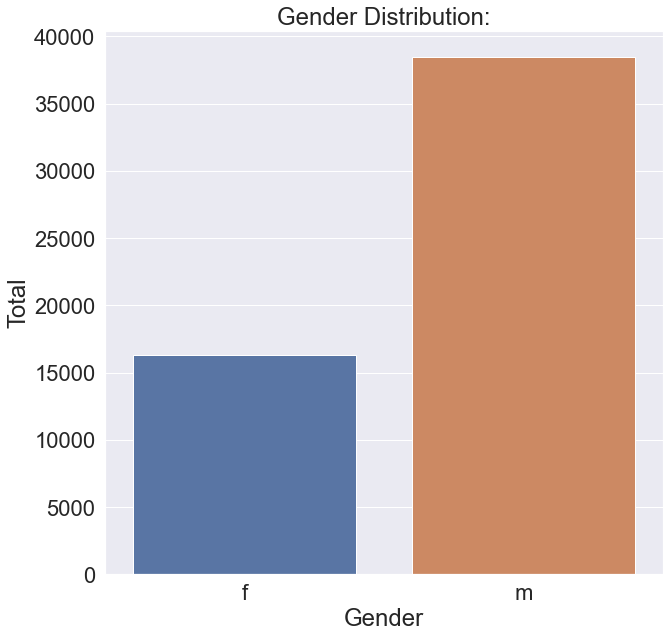

In [163]:
# Make plot of employee's gender distribution:
plt.figure(figsize=(10,10))
sns.countplot(train['gender'])
plt.title('Gender Distribution:')
plt.xlabel('Gender')
plt.ylabel('Total')

In [164]:
# Gender Distribution Percentage:
gen_tot = len(train['gender'])
print(f'Total is: {gen_tot}')
m = len(train[train['gender'] == 'm'])
print(f'Male Total is: {m}')
f = len(train[train['gender'] == 'f'])
print(f'Female Total is: {f}')

m_perc = round(((m / gen_tot) * 100), 2)
print(f'Male Percentage is: {m_perc}%')
f_perc = round(((f / gen_tot) * 100), 2)
print(f'Female Percentage is: {f_perc}%')

Total is: 54808
Male Total is: 38496
Female Total is: 16312
Male Percentage is: 70.24%
Female Percentage is: 29.76%


There is a total of 54,808 employees in the dataset. The `male` employees make up `70.24%` of the total while `female` employees make up `29.76%`.

We will also plot a histogram to display the age distribution of the employees in the dataset.

##### e) Age Distribution:

Text(0.5, 1.0, 'Age Distribution')

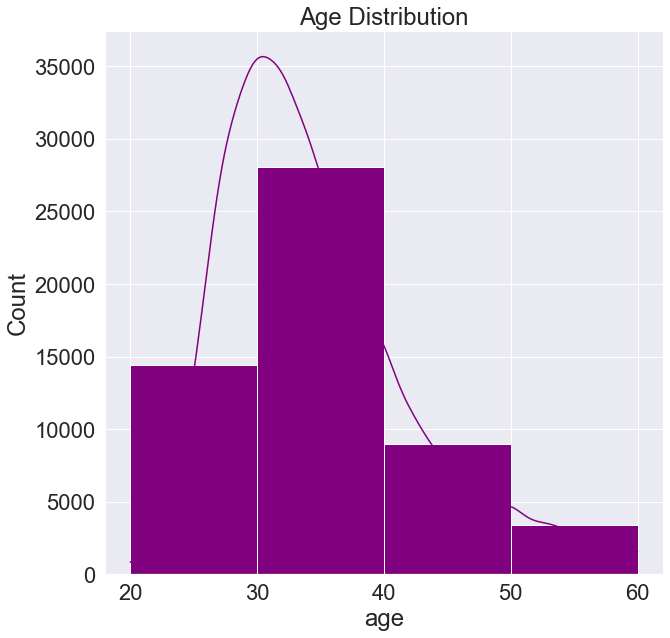

In [165]:
# Plot of employees' Age distribution:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=2)
sns.histplot(data=train, x='age', color='purple', alpha=1, bins=4, kde=True)
plt.title('Age Distribution')

The above histogram can be summarized in the following way:

In [166]:
# Histogram Summary:
# Age 20 - 30
u_30 = len(train[train['age'] < 30])
print(f'There are {u_30} employees between age 20 - 30.')

# Age 30 - 40
o30_40 = len(train[train['age'] < 40]) - len(train[train['age'] < 30])
print(f'There are {o30_40} employees between age 30 - 40.') 

# Age 40 - 50
o40_50 = len(train[train['age'] < 50]) - len(train[train['age'] < 40])
print(f'There are {o40_50} employees between age 40 - 50.')

# Age 50 - 60
o50_60 = len(train[train['age'] < 60]) - len(train[train['age'] < 50])
print(f'There are {o50_60} employees between age 50 - 60.')

There are 14453 employees between age 20 - 30.
There are 28030 employees between age 30 - 40.
There are 8952 employees between age 40 - 50.
There are 3156 employees between age 50 - 60.


#### 5. Feature Engineering:

##### a) Feature Selection:

We need to extract the features that are best suited for our models. We will use `Variance Thresholding` to determine the ideal selection of predictor variables (features) for this step. 
First, we will define our features(X) and labels(y). Then transform all non-integer/non-float columns using the OrdinalEncoder. This transformation is vital because Machine Learning models require their inputs in numeric format (int/float).

But first, let's split the dataset into X and y. 

In [167]:
# Define Features & Labels:
X = train.drop(["employee_id","is_promoted"], axis=1) 
y = train["is_promoted"]

We can as well determine the number of unique values in each column:

In [168]:
# Number of Unique Values in Each Column:
X.nunique(axis=0)

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     6
length_of_service       35
awards_won?              2
avg_training_score      61
dtype: int64

##### b) Feature Extraction:

In [169]:
# Encoder:
encoder = OrdinalEncoder()

Using Variance `Thresholding`, we will be dropping 75% or more similar columns.

In [170]:
# Transform the Data:
X[['department','region','education', 'gender','recruitment_channel']] = encoder.fit_transform(X[['department','region','education', 'gender','recruitment_channel']])

In [171]:
# Variance Threshold
v_thresh = VarianceThreshold(threshold=0.25)
v_thresh.fit(X)
v_thresh.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True])

From the above output: `True` means **Low Variance**, `False` means **High Variance**. Let's have a look at the columns having **Low Variance**

In [172]:
# Low Variance Columns:
low_cols = [col for col in X.columns if col not in X.columns[v_thresh.get_support()]]
for f in low_cols:
    print(f)

gender
awards_won?


The `'gender'` and `'awards_won?'` columns have low variance, meaning that they are not well suited to serve as predictor variables. Therefore, we will retain all other columns except these two.

In [173]:
# Dropping Low Variance Columns:
X = X.drop(low_cols, axis=1)
X.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,7.0,31.0,2.0,2.0,1,35,5.0,8,49
1,4.0,14.0,0.0,0.0,1,30,5.0,4,60
2,7.0,10.0,0.0,2.0,1,34,3.0,7,50
3,7.0,15.0,0.0,0.0,2,39,1.0,10,50
4,8.0,18.0,0.0,0.0,1,45,3.0,2,73


##### c) Train_Test_Split:
We will split our features(X) and labels(y) into a training set (80%) & testing set (20%). We do this to prevent overfitting our models to the data.

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

##### d) Balance the dataset:
As observed previously, the distribution of samples(rows) per label (0, 1) is uneven. The dataset is imbalanced. Suppose we train our classification models on the data as it is. In that case, the result will be that the models will be better at generalizing/classifying instances of the majority class because of their higher number of samples. We need to prevent this outcome. Therefore, the solution is to resample our data. Oversampling will increase the number of samples in the minority class, and Undersampling will reduce the number of samples in the majority class. The goal is to balance the number of samples in each class (0,1). For this, we will use SMOTE for oversampling and Random Undersampling.

In [175]:
# First, create a pipeline.
oversamp = SMOTE(sampling_strategy=0.1)
undersamp = RandomUnderSampler(sampling_strategy=0.7) # 0.7 best
steps = [('o', oversamp), ('u', undersamp)]
pipeline = Pipeline(steps=steps)

# Then, resample the dataset using the pipeline.
X_train, y_train = pipeline.fit_resample(X_train, y_train)

Let's take another look at the new class distribution:

In [176]:
y_train.value_counts()

0    5731
1    4012
Name: is_promoted, dtype: int64

We see that the difference between the number of samples in each class is significantly smaller, which is acceptable now. The next step is the modeling phase, where we will train classification models on our freshly resampled data. 

#### 6. Modeling:
We will train 3 Machine Learning Classification Models, Logistic Regression, the Support Vector Classifier & a Naive Bayes Classifier. Afterward, these respective models will be evaluated, and the best-performing model will be selected. 

##### a) Load Models:

In [177]:
# Instantiating ML Classification Models:
lr_model = LogisticRegression()
sv_model = SVC()
nb_model = GaussianNB()

#####  b) Train Models:
We will next train the models:

In [178]:
# Logistic Regression:
lr_model.fit(X_train, y_train) 

LogisticRegression()

In [179]:
# Support Vector Classifier:
sv_model.fit(X_train, y_train)  

SVC()

In [180]:
# Naive Bayes Classifier:
nb_model.fit(X_train, y_train) 

GaussianNB()

The models have been trained. The next step is to perform the classification tasks. Then, using the models, we will be `"making predictions"` using the test set.

##### c) Perform Classification/make Predictions:
We will make predictions using the three (3) models and save the results of each.

In [181]:
# Logistic Regression Classification:
lr_ypred =lr_model.predict(X_test)

In [182]:
# SVC Classification:
svc_ypred =sv_model.predict(X_test)

In [183]:
# Naive Bayes Classification:
nb_ypred = nb_model.predict(X_test)

#### 7. Model Evaluation:
It is time to evaluate the performance of the models. We will use the classification report because it will provide comprehensive details about the performance of each model.

##### a) Classification Report:

In [184]:
# Logistic Regression Evaluation:
print(classification_report(lr_ypred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      8266
           1       0.49      0.17      0.26      2696

    accuracy                           0.75     10962
   macro avg       0.63      0.56      0.55     10962
weighted avg       0.71      0.75      0.70     10962



In [185]:
# SVC Evaluation:
print(classification_report(svc_ypred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9289
           1       0.38      0.22      0.27      1673

    accuracy                           0.83     10962
   macro avg       0.62      0.58      0.59     10962
weighted avg       0.79      0.83      0.81     10962



In [186]:
# Naive Bayes Evaluation:
print(classification_report(nb_ypred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      7793
           1       0.57      0.17      0.26      3169

    accuracy                           0.72     10962
   macro avg       0.65      0.56      0.55     10962
weighted avg       0.69      0.72      0.66     10962



From the above classification reports, it can be concluded that the **best** performing model is the **Suppor Vector Classifier (SVC)**, having **83% Accuracy** based on the f1-score. 

We will save the best-performing model (SVC) as a file so that it can be retrieved for later use without the need to retrain it.

##### b) Save best Model:

In [187]:
# Saving model as a .pkl file:
model_file = 'SVC_model.pkl'
pickle.dump(sv_model, open(model_file, 'wb'))

#### 8. Classification on Test Dataset:
As stated at the beginning, the objective of this project is to **Predict the eligible candidates for promotion**. As a result, the best-performing model (SVC) has been saved, and our goal can finally be met.

The saved SVC model will be used on the test dataset. It requires similar inputs as those used to train it. It is essential to meet this requirement. Therefore, we need to prepare the test dataset by following the steps previously used for data preprocessing and feature selection.

##### a) Load Test Dataset:

In [188]:
# Test Dataset:
test = pd.read_csv('test.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


##### b) Data Preprocessing. 

In [189]:
# Check for missing Values:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

###### **Filling Missing Values**:

In [190]:
# Determine Median of test['previous_year_rating']:
rating_mean = round(test['previous_year_rating'].mean(), 1)

# Fill NULL with 'rating_mean':
test['previous_year_rating'] = test['previous_year_rating'].fillna(rating_mean)

In [191]:
# Determine the mode of test['education'] 
education_mode = test['education'].mode()[0]

# Fill NULL with 'education_mode':
test['education'] = test['education'].fillna(education_mode)

In [192]:
# Check for missing Values again:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

##### c) Feature Extraction:

In [193]:
# Define Features:
X1 = test.drop(["employee_id"], axis=1) 

In [194]:
# Transform Data:
X1[['department','region','education', 'gender','recruitment_channel']] = encoder.transform(X1[['department','region','education', 'gender','recruitment_channel']])

In [195]:
# Drop columns previously found to have low variance:
X1 = X1.drop(["gender", "awards_won?"], axis=1)

In [196]:
# confirm the tranformation of the data:
X1.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,8.0,18.0,0.0,2.0,1,24,3.3,1,77
1,2.0,28.0,0.0,0.0,1,31,3.0,5,51
2,7.0,4.0,0.0,0.0,1,31,1.0,4,47
3,5.0,11.0,0.0,0.0,3,31,2.0,9,65
4,1.0,21.0,0.0,2.0,1,30,4.0,7,61


#### d) Classification/Predictions on the test dataset:

In [197]:
# Retrieve Saved Model:
model_svc = pickle.load(open('SVC_model.pkl', 'rb'))

In [198]:
# Make Predictions with loaded model:
y_hat = model_svc.predict(X1)

In [202]:
# Display first 10 predictions:
y_hat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

##### e) Create a DataFrame to store predictions and save it as a `.csv` file:

In [207]:
# Create Dataframe from predictions:
predictions = pd.DataFrame()
predictions.index = np.arange(len(y_hat))
predictions['employee_id'] = test.employee_id
predictions['promoted_?'] = y_hat
# predictions.set_index('employee_id', inplace=True)

In [209]:
predictions.head()

,employee_id,promoted_?
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [210]:
predictions.to_csv("employee_preds.csv")

### Conclusion

The objective of this project was to **Predict the eligible candidates for promotion**. 
We discovered that the dataset had missing values/empty rows and a class imbalance. Therefore, corrective measures were used, namely data imputation for the missing values and resampling techniques(oversampling & undersampling). This was a necessary step before the modeling phase.
The train dataset was then used to train 3 ML classification models:
 + Logistic Regression 
 + Naive Bayes, and 
 + Support Vector Classifier(SVC). 

The latter, `SVC`, was the best performing model having an `accuracy` measure (by f1-score) of `83%`. 

The SVC Classifier is based on SVM (Support Vector Machine), which works by mapping data to a high-dimensional feature space to categorize data points, even when the data are not otherwise linearly separable. First, a separator between the categories is found, then the data are transformed so that the separator can be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

The application of Machine Learning, such as on this project, would greatly assist HR (Human Resource) professionals and senior management staff in determining the likelihood of an employee being promoted and identifying the right people, the eligible candidates for promotion based on their historical data.

There is room for improvement in model performance and creating an application with a Graphical User Interface (GUI) to enable HR professionals to access this implementation of Artificial Intelligence easily.  

Reference: https://www.ibm.com/docs/it/spss-modeler/SaaS?topic=models-how-svm-works 